In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from pre_processing import DfBankAdditional

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

#mission: predict if the client will subscribe (yes/no) a term deposit (variable y).
# Load Training and Test Data Sets
headers = ['age', 'job', 'marital', 
           'education', 'default', 
           'housing', 'loan', 
           'contact', 'month', 'day_of_week', 
           'duration', 'campaign', 
           'pdays', 'previous', 
           'poutcome','emp.var.rate','cons.price.idx',
           'cons.conf.idx','euribor3m','nr.employed','y']
training_raw = DfBankAdditional(pd.read_csv('dataset/bank-additional-full.csv', 
                       header=None, 
                       names=headers, 
                       sep=';', 
                       na_values=["?"], 
                       engine='python',
                          skiprows=1,
                          index_col=False))
test_raw = DfBankAdditional(pd.read_csv('dataset/bank-additional.csv', 
                      header=None, 
                      names=headers, 
                      sep=';', 
                      na_values=["?"], 
                      engine='python', 
                      skiprows=1,
                      index_col=False))
training_raw.process_all()
test_raw.process_all()

In [2]:
# Join Datasets
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)
dataset_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,lower income,married,Dropout,no,no,no,telephone,may,0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,lower income,married,high.school,unknown,no,no,telephone,may,0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,lower income,married,high.school,no,yes,no,telephone,may,0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,lower income,married,high.school,no,no,yes,telephone,may,0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0


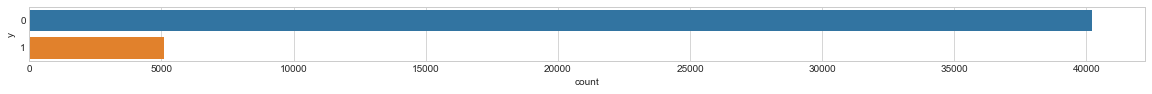

In [3]:
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables 

dataset_bin['y'] = dataset_raw['y']
dataset_con['y'] = dataset_raw['y']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="y", data=dataset_bin);

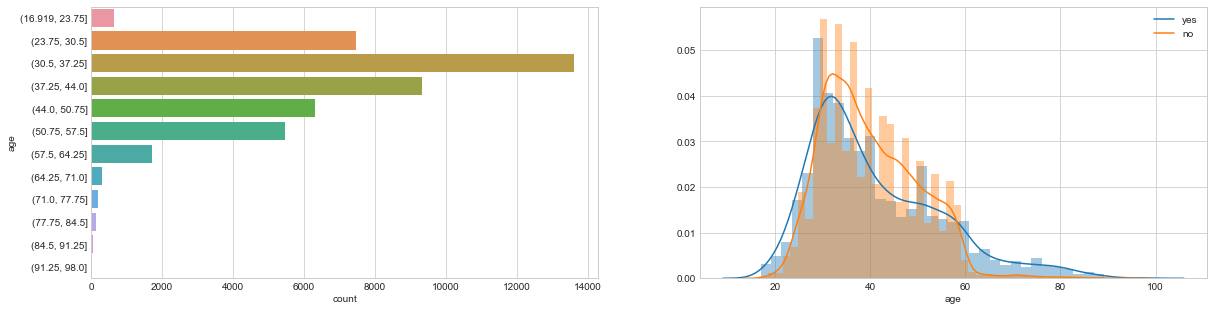

In [4]:
#Feature:age
dataset_bin['age'] = pd.cut(dataset_raw['age'], 12) 
dataset_con['age'] = dataset_raw['age'] # non-discretised

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['y'] == 1]['age'], kde_kws={"label": "yes"});
sns.distplot(dataset_con.loc[dataset_con['y'] == 0]['age'], kde_kws={"label": "no"});

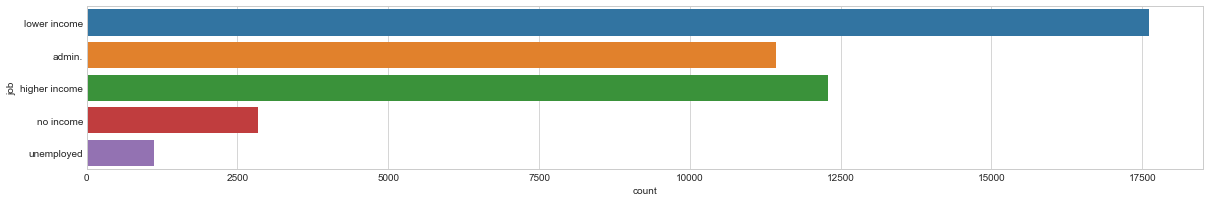

In [5]:
#Feature:job
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="job", data=dataset_raw);

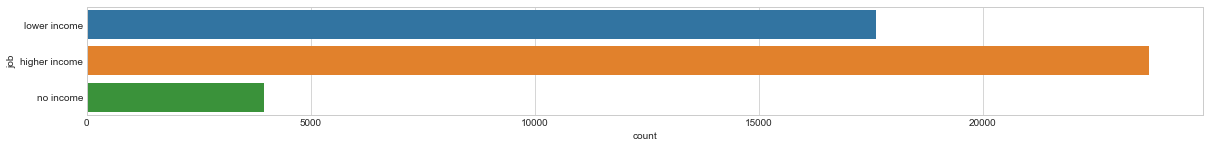

In [24]:
dataset_bin['job'] = dataset_raw['job']
dataset_con['job'] = dataset_raw['job']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,2)) 
sns.countplot(y="job", data=dataset_bin);

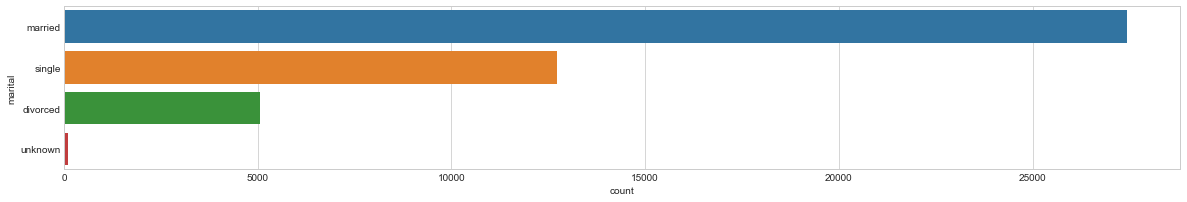

In [6]:
#feature marital
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital", data=dataset_raw);

In [26]:
dataset_bin['marital'] = dataset_raw['marital']
dataset_con['marital'] = dataset_raw['marital']

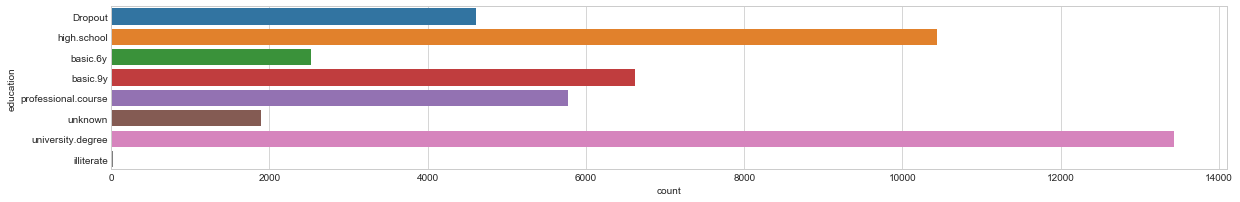

In [7]:
#feature education
dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="education", data=dataset_raw)

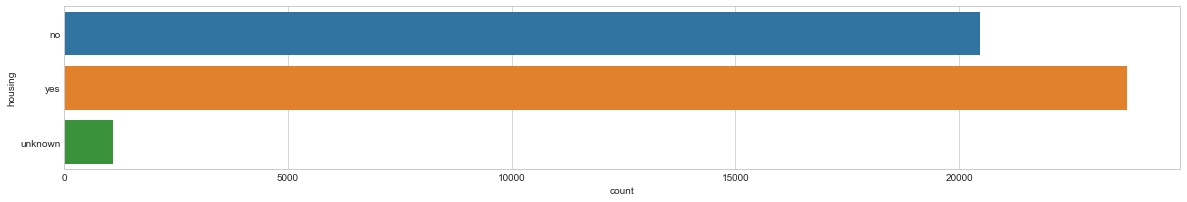

In [8]:
#feature housing
dataset_bin['housing'] = dataset_raw['housing']
dataset_con['housing'] = dataset_raw['housing']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="housing", data=dataset_raw)

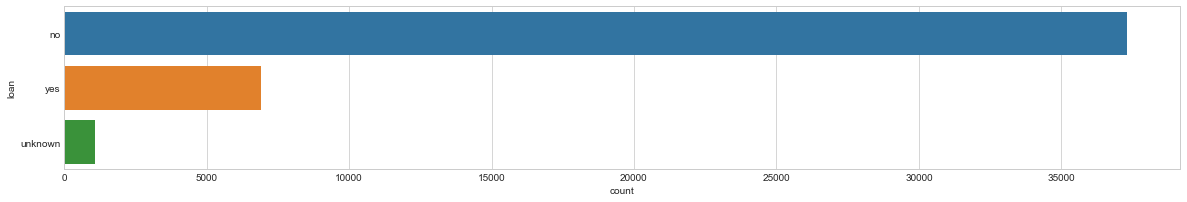

In [9]:
#feature loan
dataset_bin['loan'] = dataset_raw['loan']
dataset_con['loan'] = dataset_raw['loan']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="loan", data=dataset_raw)

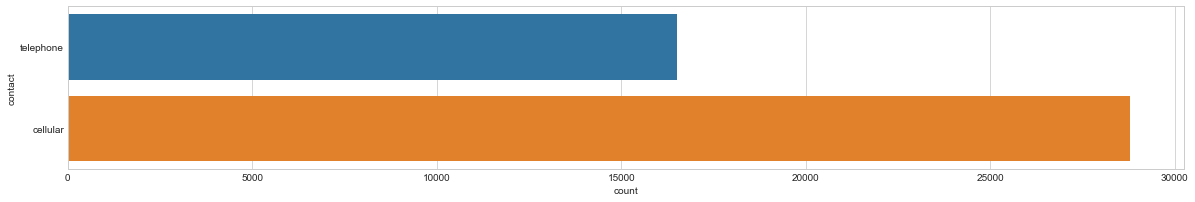

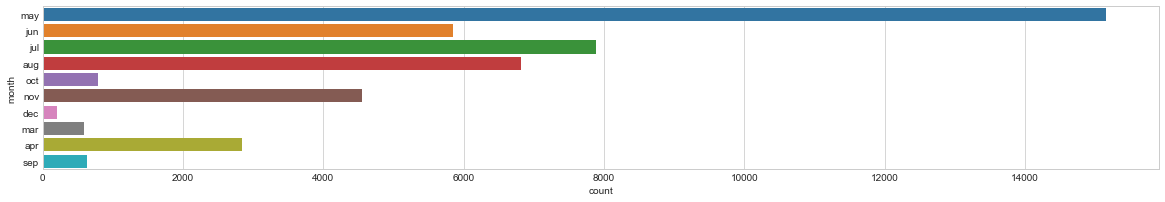

In [10]:
#feature contact
dataset_bin['contact'] = dataset_raw['contact']
dataset_con['contact'] = dataset_raw['contact']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="contact", data=dataset_raw)

#feature month
dataset_bin['month'] = dataset_raw['month']
dataset_con['month'] = dataset_raw['month']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="month", data=dataset_raw)

In [11]:
# One Hot Encodes 
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('y')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)

dataset_bin_enc.head()

,y,"age_(16.919, 23.75]","age_(23.75, 30.5]","age_(30.5, 37.25]","age_(37.25, 44.0]","age_(44.0, 50.75]","age_(50.75, 57.5]","age_(57.5, 64.25]","age_(64.25, 71.0]","age_(71.0, 77.75]",...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# Label Encode 
dataset_con_test = dataset_con
dataset_con_enc = dataset_con_test.apply(LabelEncoder().fit_transform)
dataset_con_enc.head()

,y,age,education,housing,loan,contact,month
0,0,39,0,0,0,1,6
1,0,40,3,0,0,1,6
2,0,20,3,2,0,1,6
3,0,23,1,0,0,1,6
4,0,39,3,0,2,1,6


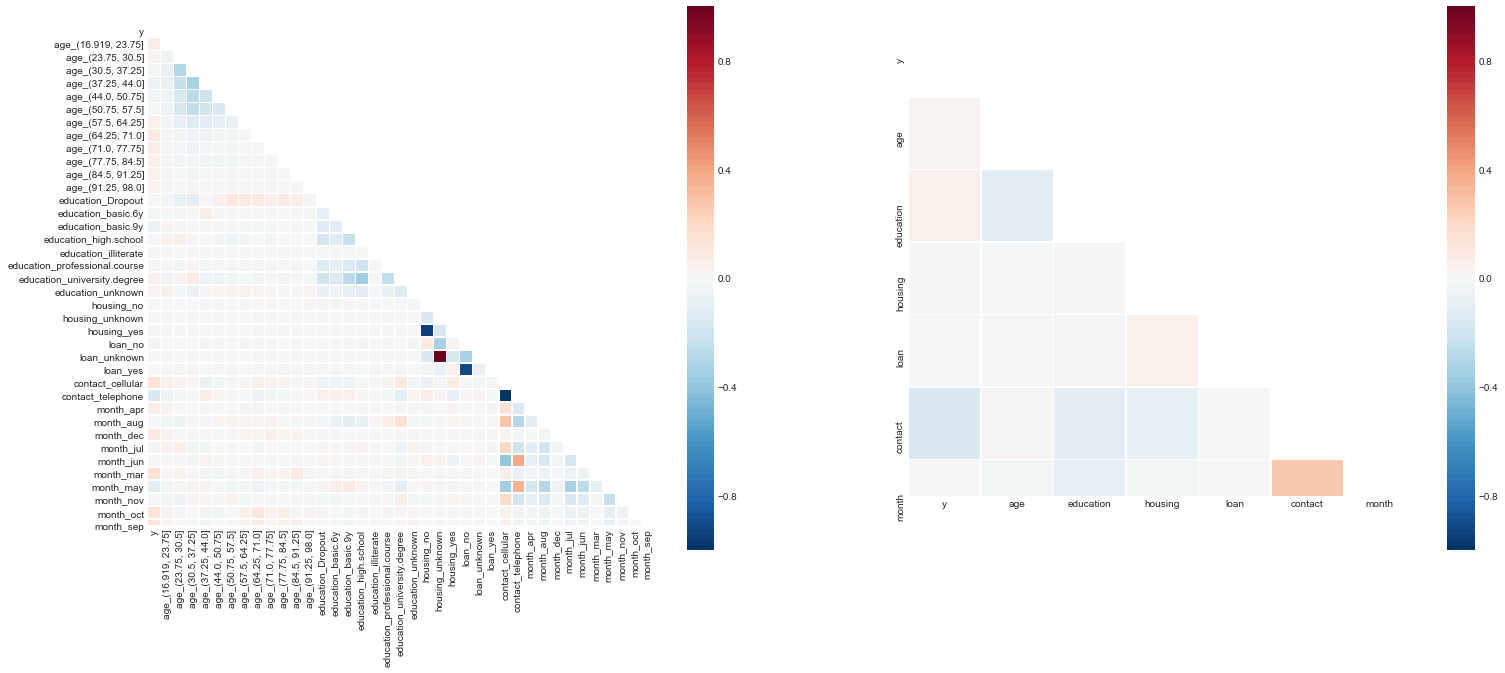

In [13]:
# create the relation-graph between 2 dataset
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)

mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

plt.subplot(1, 2, 2)
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

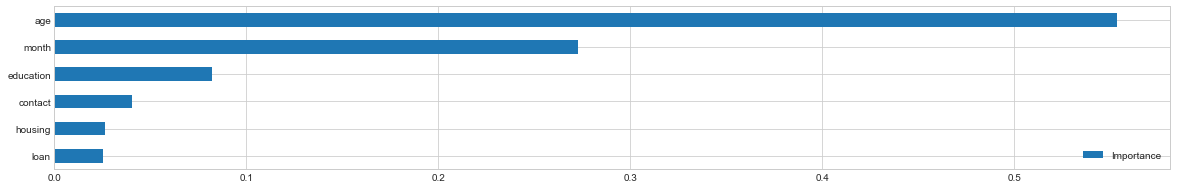

In [14]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_con_enc.drop('y', axis=1), dataset_con_enc['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));